# Первичное предсказание оттока клиентов мобильного оператора 
## (Анализ данных с Pandas)

In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (8, 6)

In [3]:
df = pd.read_csv("telecom_churn.csv")

In [4]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

In [5]:
pd.set_option("precision", 1)

In [6]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.1,197.4,99,16.8,244.7,91,11.0,10.0,3,2.7,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.5,195.5,103,16.6,254.4,103,11.4,13.7,3,3.7,1,False
2,NJ,137,415,No,No,0,243.4,114,41.4,121.2,110,10.3,162.6,104,7.3,12.2,5,3.3,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.9,61.9,88,5.3,196.9,89,8.9,6.6,7,1.8,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.3,148.3,122,12.6,186.9,121,8.4,10.1,3,2.7,3,False


In [7]:
df.shape

(3333, 20)

In [8]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [10]:
df["Churn"] = df["Churn"].astype("int64")

In [11]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0
mean,101.1,437.2,8.1,179.8,100.4,30.6,201.0,100.1,17.1,200.9,100.1,9.0,10.2,4.5,2.8,1.6,0.1
std,39.8,42.4,13.7,54.5,20.1,9.3,50.7,19.9,4.3,50.6,19.6,2.3,2.8,2.5,0.8,1.3,0.4
min,1.0,408.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.2,33.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,74.0,408.0,0.0,143.7,87.0,24.4,166.6,87.0,14.2,167.0,87.0,7.5,8.5,3.0,2.3,1.0,0.0
50%,101.0,415.0,0.0,179.4,101.0,30.5,201.4,100.0,17.1,201.2,100.0,9.1,10.3,4.0,2.8,1.0,0.0
75%,127.0,510.0,20.0,216.4,114.0,36.8,235.3,114.0,20.0,235.3,113.0,10.6,12.1,6.0,3.3,2.0,0.0
max,243.0,510.0,51.0,350.8,165.0,59.6,363.7,170.0,30.9,395.0,175.0,17.8,20.0,20.0,5.4,9.0,1.0


In [12]:
df["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [13]:
df["Churn"].mean()

0.14491449144914492

14,5% — довольно плохой показатель оттока для компании

In [14]:
df.sort_values(by=["Total day charge", "Churn"], ascending=[False, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.6,216.5,94,18.4,253.9,100,11.4,10.1,9,2.7,1,1
985,NY,64,415,Yes,No,0,346.8,55,59.0,249.5,79,21.2,275.4,102,12.4,13.3,9,3.6,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.7,203.4,106,17.3,217.5,107,9.8,11.8,8,3.2,1,1
156,OH,83,415,No,No,0,337.4,120,57.4,227.4,116,19.3,153.9,114,6.9,15.8,7,4.3,0,1
605,MO,112,415,No,No,0,335.5,77,57.0,212.5,109,18.1,265.0,132,11.9,12.7,8,3.4,2,1


In [15]:
df[df["Churn"] == 1].mean()

Account length            102.7
Area code                 437.8
Number vmail messages       5.1
Total day minutes         206.9
Total day calls           101.3
Total day charge           35.2
Total eve minutes         212.4
Total eve calls           100.6
Total eve charge           18.1
Total night minutes       205.2
Total night calls         100.4
Total night charge          9.2
Total intl minutes         10.7
Total intl calls            4.2
Total intl charge           2.9
Customer service calls      2.2
Churn                       1.0
dtype: float64

In [16]:
d = {"No": False, "Yes": True}
df["International plan"] = df["International plan"].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.1,197.4,99,16.8,244.7,91,11.0,10.0,3,2.7,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.5,195.5,103,16.6,254.4,103,11.4,13.7,3,3.7,1,0
2,NJ,137,415,False,No,0,243.4,114,41.4,121.2,110,10.3,162.6,104,7.3,12.2,5,3.3,0,0
3,OH,84,408,True,No,0,299.4,71,50.9,61.9,88,5.3,196.9,89,8.9,6.6,7,1.8,2,0
4,OK,75,415,True,No,0,166.7,113,28.3,148.3,122,12.6,186.9,121,8.4,10.1,3,2.7,3,0


In [17]:
columns_to_show = ["Total day minutes"]

df.groupby(["Churn"])[columns_to_show].describe(percentiles=[])

Total day minutes                                
                  count   mean   std  min    50%    max
Churn                                                  
0                2850.0  175.2  50.2  0.0  177.2  315.6
1                 483.0  206.9  69.0  0.0  217.6  350.8

Т.е. видим, что клиенты, которые уходят из компании, на самом деле больше пользуются услугами связи

In [18]:
pd.crosstab(df["Churn"], df["International plan"])

International plan,False,True
Churn,,
0,2664,186
1,346,137


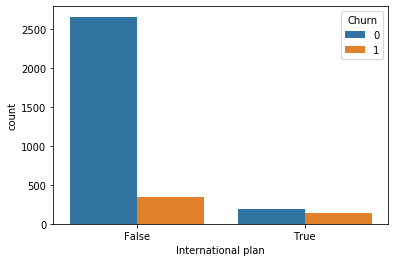

In [19]:
sns.countplot(x="International plan", hue="Churn", data=df)
plt.savefig("int_plan_and_churn.png", dpi=300);

Видим, что когда роуминг подключен, доля оттока намного выше! Возможно, траты в роуминге и приводят к недовольству клиентов  и к их оттоку. 